In [ ]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
from PIL import Image

Using TensorFlow backend.


In [ ]:
print(os.listdir('E:/Datasetsskripsi/Bkl Vs Bcc'))

NameError: ignored

In [ ]:
path1 = 'E:/Datasetsskripsi/Bkl Vs Bcc/train'    #path of folder of images
path2 = 'E:/Datasetsskripsi/Bkl Vs Bcc/train_resized'
img_rows, img_cols = 150, 150
listing = os.listdir(path1)

for file in listing:
    im = Image.open(path1 + '\\' + file)
    img = im.resize((img_rows,img_cols))
    img.save(path2 +'\\' +  file, "JPEG")
imlist = os.listdir(path2)

In [ ]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [ ]:
# creating df with train labels
train_filenames = os.listdir('E:/Datasetsskripsi/Bkl Vs Bcc/train_resized')
train_labels = []
for filename in train_filenames:
    label = filename.split('.')[0]
    if label == 'bcc':
        train_labels.append(1)
    else:
        train_labels.append(2)


df = pd.DataFrame({
    'id': train_filenames,
    'label': train_labels
})

In [ ]:
df.head()

,id,label
0,bcc.0.jpg,1
1,bcc.1.jpg,1
2,bcc.10.jpg,1
3,bcc.100.jpg,1
4,bcc.101.jpg,1


In [ ]:
df.tail()

,id,label
1503,bkl.995.jpg,2
1504,bkl.996.jpg,2
1505,bkl.997.jpg,2
1506,bkl.998.jpg,2
1507,bkl.999.jpg,2


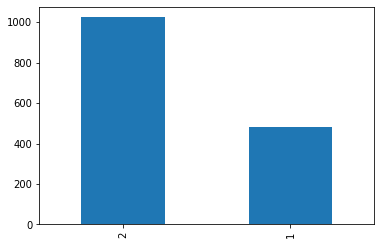

In [ ]:
df['label'].value_counts().plot.bar()

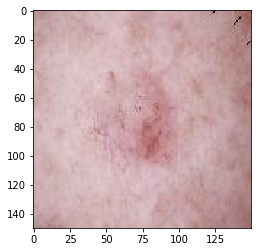

In [ ]:
sample = random.choice(train_filenames)
image = load_img("E:/Datasetsskripsi/Bkl Vs Bcc/train_resized/"+sample)
plt.imshow(image)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have 2 classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)       

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
earlystop = EarlyStopping(patience=10)

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

In [ ]:
callbacks = [earlystop, learning_rate_reduction]

In [ ]:
df["label"] = df["label"].replace({1: 'bcc', 2: 'bkl'})

In [ ]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

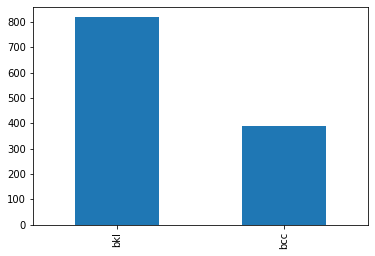

In [ ]:
train_df['label'].value_counts().plot.bar()

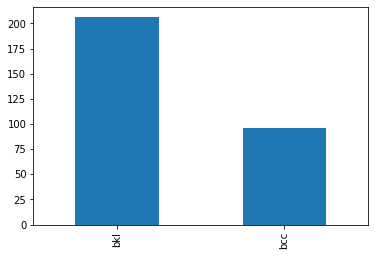

In [ ]:
validate_df['label'].value_counts().plot.bar()

In [ ]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=8

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    "E:/Datasetsskripsi/Bkl Vs Bcc/train_resized",
    x_col='id',
    y_col='label',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 1206 validated image filenames belonging to 2 classes.


In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df,
    "E:/Datasetsskripsi/Bkl Vs Bcc/train_resized",
    x_col='id',
    y_col='label',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 302 validated image filenames belonging to 2 classes.


In [ ]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df,
    "E:/Datasetsskripsi/Bkl Vs Bcc/train_resized",
    x_col='id',
    y_col='label',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


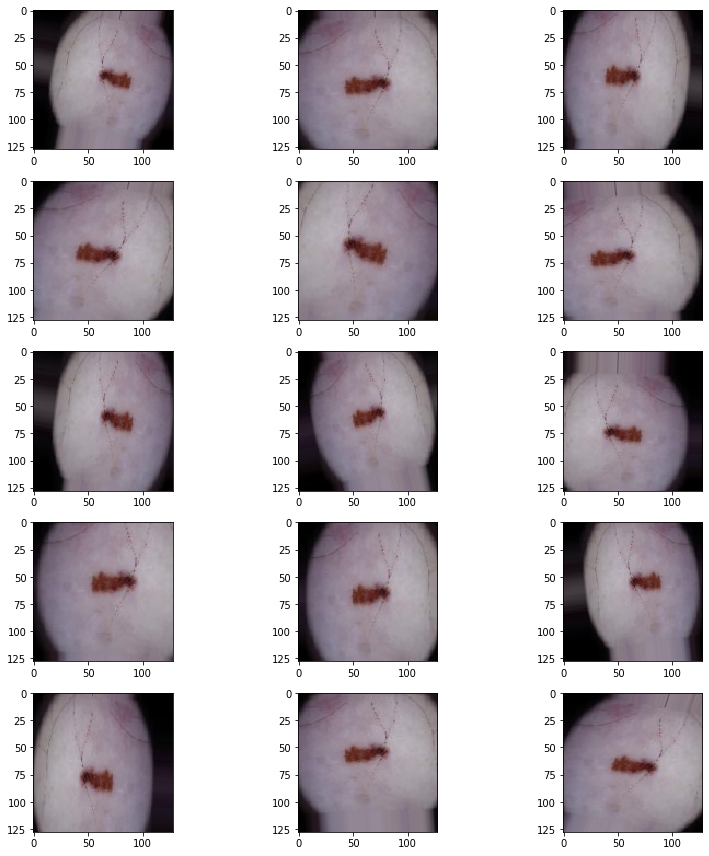

In [ ]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [ ]:
epochs=3 if FAST_RUN else 15
history = model.fit_generator(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/15
37/37 [==============================] - 309s 8s/step - loss: 1.2706 - accuracy: 0.6610 - val_loss: 1.0737 - val_accuracy: 0.3194
Epoch 2/15


c:\users\indah\appdata\local\programs\python\python36\lib\site-packages\keras\callbacks\callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


37/37 [==============================] - 291s 8s/step - loss: 0.7682 - accuracy: 0.7317 - val_loss: 1.4447 - val_accuracy: 0.6926
Epoch 3/15
37/37 [==============================] - 297s 8s/step - loss: 0.6982 - accuracy: 0.7419 - val_loss: 1.2029 - val_accuracy: 0.3296
Epoch 4/15
37/37 [==============================] - 308s 8s/step - loss: 0.5843 - accuracy: 0.7652 - val_loss: 0.9596 - val_accuracy: 0.3259
Epoch 5/15
37/37 [==============================] - 302s 8s/step - loss: 0.5426 - accuracy: 0.7809 - val_loss: 0.6082 - val_accuracy: 0.6667
Epoch 6/15
37/37 [==============================] - 246s 7s/step - loss: 0.5300 - accuracy: 0.7872 - val_loss: 0.6875 - val_accuracy: 0.6815
Epoch 7/15
37/37 [==============================] - 170s 5s/step - loss: 0.4775 - accuracy: 0.7955 - val_loss: 0.7958 - val_accuracy: 0.7148
Epoch 8/15
37/37 [==============================] - 167s 5s/step - loss: 0.4490 - accuracy: 0.7998 - val_loss: 0.6001 - val_accuracy: 0.6889
Epoch 9/15
37/37 [======

In [ ]:
model.save_weights("modelBklVsBcc.h5")

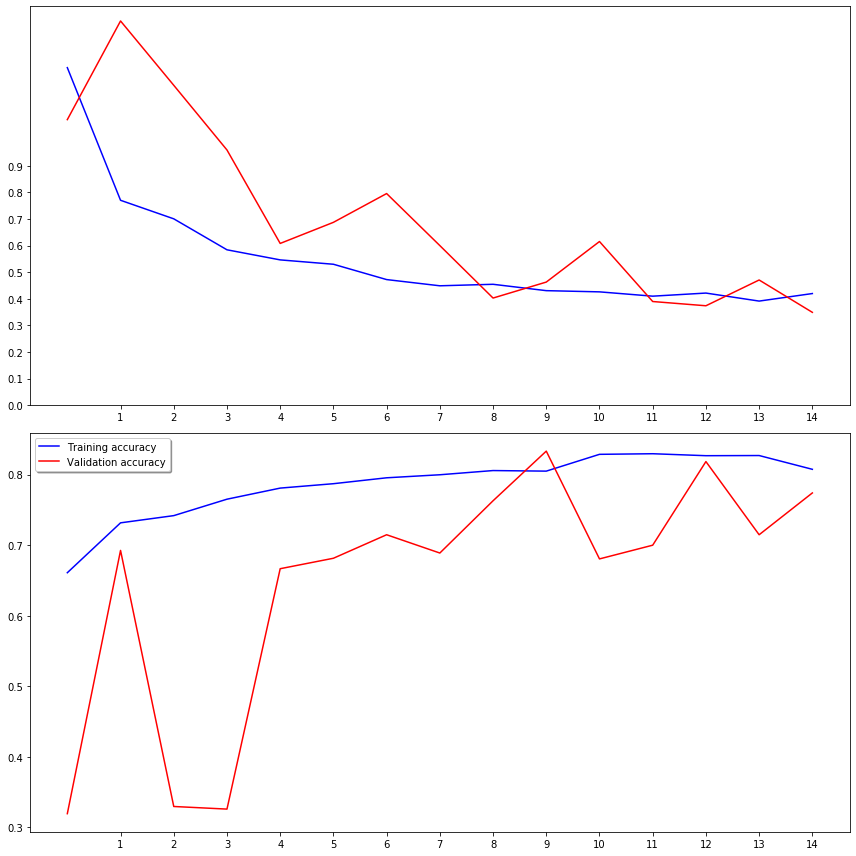

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))


ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))


legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [ ]:
test_filenames = os.listdir("E:/Datasetsskripsi/Bkl Vs Bcc/test")
test_df = pd.DataFrame({
    'id': test_filenames
})
nb_samples = test_df.shape[0]

In [ ]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df,
    "E:/Datasetsskripsi/Bkl Vs Bcc/test",
    x_col='id',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 105 validated image filenames.


In [ ]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

In [ ]:
test_df['label'] = np.argmax(predict, axis=-1)

In [ ]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['label'] = test_df['label'].replace(label_map)

In [ ]:
test_df['label'] = test_df['label'].replace({ 'bkl': 2, 'bcc': 1 })

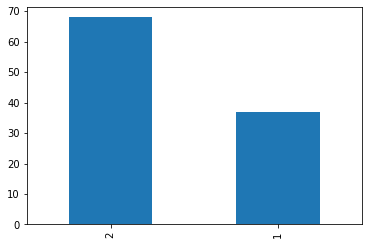

In [ ]:
test_df['label'].value_counts().plot.bar()

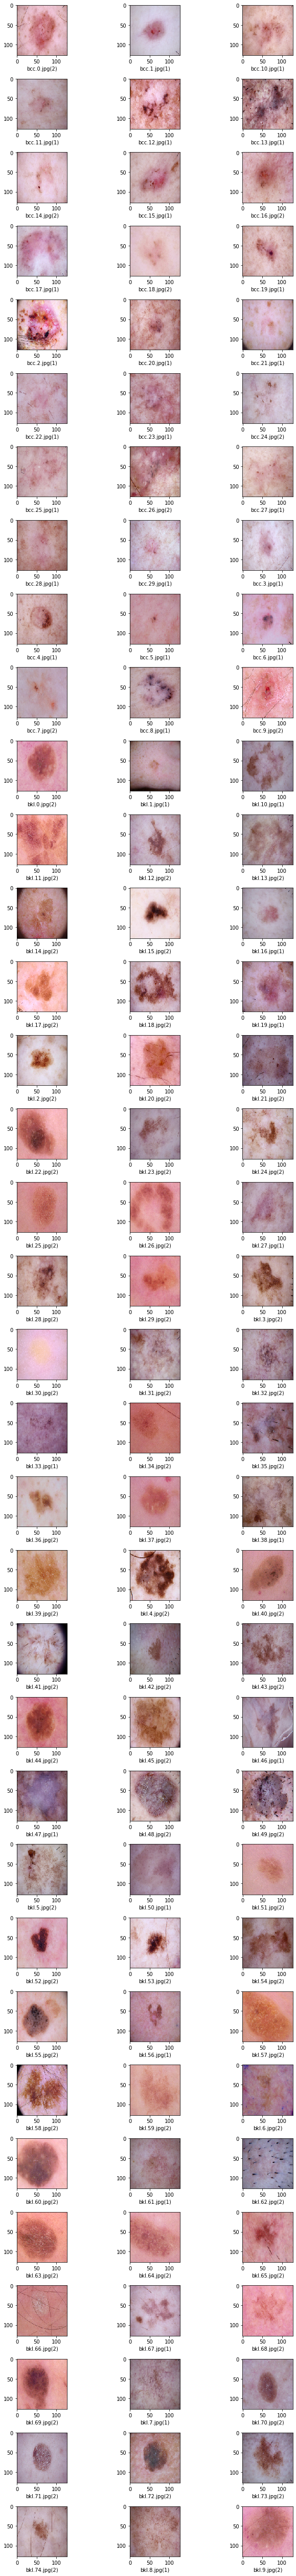

In [ ]:
sample_test = test_df.head(105)
sample_test.head()
plt.figure(figsize=(10, 70))
for index, row in sample_test.iterrows():
    filename = row['id']
    category = row['label']
    img = load_img("E:/Datasetsskripsi/Bkl Vs Bcc/test/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(35, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()